In [1]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_envs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_envs` for environment variables or `env.get_wrapper_attr('num_envs')` that will search the reminding wrappers.
  logger.warn(
/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_vector_env to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_vector_env` for environment variables or `env.get_wrapper_attr('is_vector_env')` that will search the reminding wrappers.
  logger.warn(
Training iterations: 100%|██████████| 100000/100000 [30:55<00:00, 53.88it/s]


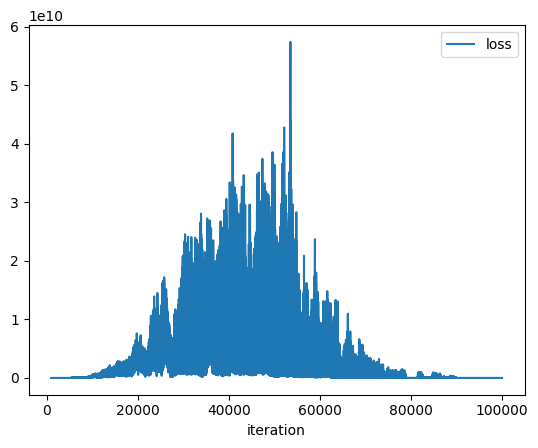

KeyError: 'hypervolume'

In [3]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "lanes_count": 4,
    "vehicles_count": 20,
    #"collision_reward": -1,    # The reward received when colliding with a vehicle.
    #"right_lane_reward": 0.1,  # The reward received when driving on the right-most lanes, linearly mapped to
                                       # zero for other lanes.
    #"high_speed_reward": 1,  # The reward received when driving at full speed, linearly mapped to zero for
                                       # lower speeds according to config["reward_speed_range"].
    #"lane_change_reward": 0,   # The reward received at each lane change action.
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
            "normalize": True,
        }
    }
})
env.unwrapped.configure({
    "manual_control": False
})

obs, info = env.reset()
agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"])
df = agent.train(100_000, epsilon_start=0.9, epsilon_end=0.05, inv_optimisation_frequency=1, num_evaluations=0)
df.plot.line(x="iteration", y="loss")
plt.show()
#df.plot.line(x="iteration", y="hypervolume")

In [ ]:
agent.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.num_envs to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.num_envs` for environment variables or `env.get_wrapper_attr('num_envs')` that will search the reminding wrappers.
  logger.warn(
/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.is_vector_env to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.is_vector_env` for environment variables or `env.get_wrapper_attr('is_vector_env')` that will search the reminding wrappers.
  logger.warn(
Training iterations: 100%|██████████| 100000/100000 [31:13<00:00, 53.37it/s]


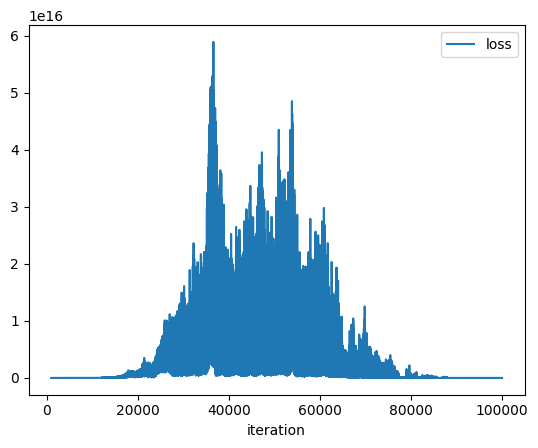

In [6]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "lanes_count": 4,
    "vehicles_count": 20,
    #"collision_reward": -1,    # The reward received when colliding with a vehicle.
    #"right_lane_reward": 0.1,  # The reward received when driving on the right-most lanes, linearly mapped to
                                       # zero for other lanes.
    #"high_speed_reward": 1,  # The reward received when driving at full speed, linearly mapped to zero for
                                       # lower speeds according to config["reward_speed_range"].
    #"lane_change_reward": 0,   # The reward received at each lane change action.
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
            "normalize": True,
        }
    }
})
env.unwrapped.configure({
    "manual_control": False
})

obs, info = env.reset()
agent_2 = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"],
                      network_hidden_sizes=[128,128])
df_2 = agent_2.train(100_000, epsilon_start=0.9, epsilon_end=0.05, inv_optimisation_frequency=1, num_evaluations=0)
df_2.plot.line(x="iteration", y="loss")
plt.show()
#df_2.plot.line(x="iteration", y="hypervolume")

In [8]:
agent_2.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

Weight tuple: 100%|██████████| 5/5 [00:40<00:00,  8.04s/it]


,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,"[0.0, 1.0]",80,0.061468,0.969466,4.917421,77.557246
1,1,0,"[0.0, 1.0]",80,0.086847,0.994844,6.947723,79.587549
2,2,0,"[0.0, 1.0]",80,0.091771,0.999769,7.341663,79.981488
3,0,1,"[0.24911756117309236, 0.7508824388269077]",80,0.026998,0.934996,2.159845,74.799670
4,1,1,"[0.24911756117309236, 0.7508824388269077]",80,0.091771,0.999769,7.341663,79.981488
5,2,1,"[0.24911756117309236, 0.7508824388269077]",80,0.036089,0.944087,2.887118,75.526942
6,0,2,"[0.49995939624761926, 0.5000406037523808]",80,0.091771,0.999769,7.341663,79.981488
7,1,2,"[0.49995939624761926, 0.5000406037523808]",80,0.073968,0.981966,5.917421,78.557246
8,2,2,"[0.49995939624761926, 0.5000406037523808]",80,0.081544,0.989541,6.523481,79.163306
9,0,3,"[0.750814159252816, 0.24918584074718386]",80,0.061089,0.969087,4.887118,77.526942


## Smooth loss and sum

Training iterations: 100%|██████████| 100000/100000 [31:09<00:00, 53.48it/s]


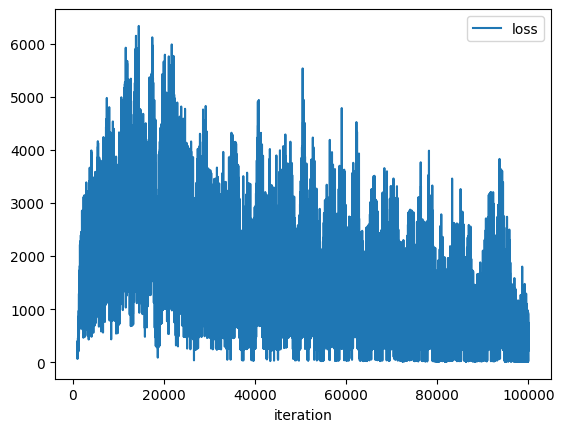

In [10]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "lanes_count": 4,
    "vehicles_count": 20,
    #"collision_reward": -1,    # The reward received when colliding with a vehicle.
    #"right_lane_reward": 0.1,  # The reward received when driving on the right-most lanes, linearly mapped to
                                       # zero for other lanes.
    #"high_speed_reward": 1,  # The reward received when driving at full speed, linearly mapped to zero for
                                       # lower speeds according to config["reward_speed_range"].
    #"lane_change_reward": 0,   # The reward received at each lane change action.
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
            "normalize": True,
        }
    }
})
env.unwrapped.configure({
    "manual_control": False
})
import torch.nn as nn
obs, info = env.reset()
agent_3 = MO_DQN.MO_DQN(env, loss_criterion=nn.SmoothL1Loss, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"],
                      network_hidden_sizes=[128,128], use_reward_normalisation_wrapper=False)
df_3 = agent_3.train(100_000, epsilon_start=0.9, epsilon_end=0.05, inv_optimisation_frequency=1, num_evaluations=0)
df_3.plot.line(x="iteration", y="loss")
plt.show()
#df_2.plot.line(x="iteration", y="hypervolume")

In [11]:
agent_3.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

Weight tuple: 100%|██████████| 5/5 [00:13<00:00,  2.80s/it]


,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,"[0.0, 1.0]",80,0.107596,0.992981,8.607718,79.438504
1,1,0,"[0.0, 1.0]",80,0.097453,0.997885,7.796209,79.830796
2,2,0,"[0.0, 1.0]",80,0.102701,0.995623,8.216054,79.649802
3,0,1,"[0.249253937411204, 0.7507460625887961]",80,0.097426,0.997885,7.794083,79.830796
4,1,1,"[0.249253937411204, 0.7507460625887961]",14,0.432587,0.715050,6.056212,10.010705
5,2,1,"[0.249253937411204, 0.7507460625887961]",13,0.419067,0.700061,5.447876,9.100791
6,0,2,"[0.5001548069036094, 0.4998451930963906]",4,0.158560,0.386981,0.634241,1.547925
7,1,2,"[0.5001548069036094, 0.4998451930963906]",6,0.271616,0.525939,1.629694,3.155632
8,2,2,"[0.5001548069036094, 0.4998451930963906]",5,0.235939,0.479447,1.179695,2.397233
9,0,3,"[0.7508424828104865, 0.24915751718951357]",22,0.533967,0.718096,11.747281,15.798101


## SMOOTH loss and occupancy grid

Training iterations: 100%|██████████| 100000/100000 [31:53<00:00, 52.27it/s]


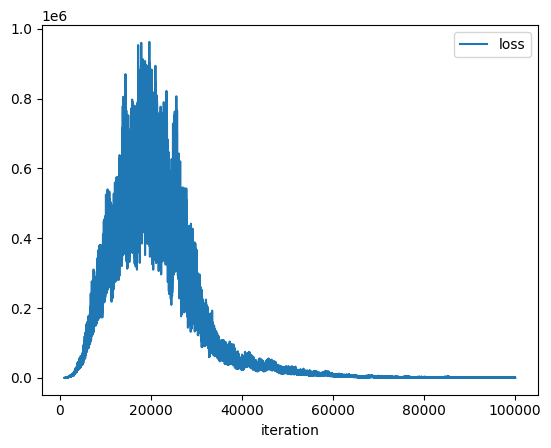

In [12]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "lanes_count": 4,
    "vehicles_count": 20,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "OccupancyGrid",
            "vehicles_count": 15,
            "features": ["presence", "x", "y", "vx", "vy"],
            "features_range": {
                "x": [-100, 100],
                "y": [-100, 100],
                "vx": [-20, 20],
                "vy": [-20, 20]
            },
            "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
            "grid_step": [5, 5],
        }
    }
})
env.unwrapped.configure({
    "manual_control": False
})
import torch.nn as nn
obs, info = env.reset()
agent_4 = MO_DQN.MO_DQN(env, loss_criterion=nn.SmoothL1Loss, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"],
                      network_hidden_sizes=[128,128], use_reward_normalisation_wrapper=False)
df_4 = agent_4.train(100_000, epsilon_start=0.9, epsilon_end=0.05, inv_optimisation_frequency=1, num_evaluations=0)
df_4.plot.line(x="iteration", y="loss")
plt.show()
#df_2.plot.line(x="iteration", y="hypervolume")

In [13]:
agent_4.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

Weight tuple: 100%|██████████| 5/5 [00:33<00:00,  6.76s/it]


,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,"[0.0, 1.0]",80,0.091771,0.999769,7.341663,79.981488
1,1,0,"[0.0, 1.0]",80,0.091771,0.999769,7.341663,79.981488
2,2,0,"[0.0, 1.0]",80,0.031165,0.939163,2.493178,75.133003
3,0,1,"[0.24928953790972655, 0.7507104620902735]",80,0.031165,0.939163,2.493178,75.133003
4,1,1,"[0.24928953790972655, 0.7507104620902735]",80,0.067123,0.967582,5.369841,77.406554
5,2,1,"[0.24928953790972655, 0.7507104620902735]",80,0.031165,0.939163,2.493178,75.133003
6,0,2,"[0.500152083133319, 0.49984791686668106]",80,0.974626,0.607843,77.970053,48.627409
7,1,2,"[0.500152083133319, 0.49984791686668106]",80,0.586159,0.768908,46.892751,61.512623
8,2,2,"[0.500152083133319, 0.49984791686668106]",80,0.936423,0.632611,74.913807,50.608876
9,0,3,"[0.7507006723032871, 0.2492993276967129]",80,0.971692,0.621748,77.735342,49.739813


In [15]:
agent_3.store_network_weights(model_path="models/", model_name="kinematics")
agent_4.store_network_weights(model_path="models/", model_name="occupancy_grid")

In [2]:
agent_4 = MO_DQN.MO_DQN(env, loss_criterion=nn.SmoothL1Loss, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"],
                      network_hidden_sizes=[128,128], use_reward_normalisation_wrapper=False)
agent_4.load_network_weights("models/_occupancy_grid")
agent_4.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

NameError: name 'env' is not defined

## Smooth Loss, Occupancy Grid, Mean reduction

Training iterations: 100%|██████████| 100000/100000 [32:03<00:00, 51.99it/s]


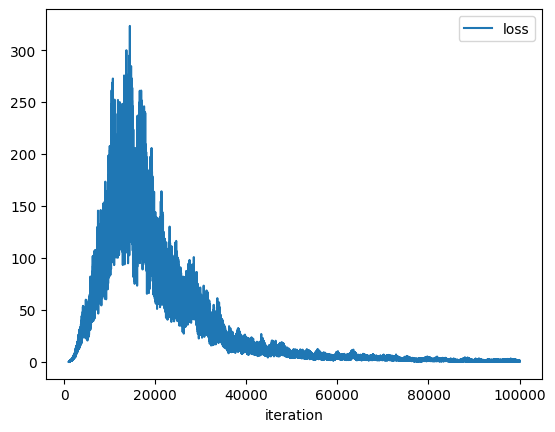

In [3]:
env = mo_gym.make('mo-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "lanes_count": 4,
    "vehicles_count": 20,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "OccupancyGrid",
            "vehicles_count": 15,
            "features": ["presence", "x", "y", "vx", "vy"],
            "features_range": {
                "x": [-100, 100],
                "y": [-100, 100],
                "vx": [-20, 20],
                "vy": [-20, 20]
            },
            "grid_size": [[-27.5, 27.5], [-27.5, 27.5]],
            "grid_step": [5, 5],
        }
    }
})
env.unwrapped.configure({
    "manual_control": False
})
import torch.nn as nn
obs, info = env.reset()
agent_5 = MO_DQN.MO_DQN(env, loss_criterion=nn.SmoothL1Loss, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, replay_buffer_size=1000, batch_ratio=0.3, objective_names=["speed_reward", "energy_reward"],
                      network_hidden_sizes=[128,128], use_reward_normalisation_wrapper=False)
df_5 = agent_5.train(100_000, epsilon_start=0.9, epsilon_end=0.05, inv_optimisation_frequency=1, num_evaluations=0)
df_5.plot.line(x="iteration", y="loss")
plt.show()
#df_2.plot.line(x="iteration", y="hypervolume")

In [5]:
agent_5.store_network_weights(model_path="models/", model_name="occupancy_grid_mean_reduction")

In [4]:
agent_5.evaluate(num_repetitions=3, num_points=5, render_episodes=True)

Weight tuple: 100%|██████████| 5/5 [00:34<00:00,  6.86s/it]


,repetition_number,weight_index,weight_tuple,num_iterations,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,"[0.0, 1.0]",80,0.109163,0.946358,8.733045,75.708604
1,1,0,"[0.0, 1.0]",80,0.129892,0.957542,10.391333,76.603324
2,2,0,"[0.0, 1.0]",80,0.086089,0.994087,6.887097,79.526942
3,0,1,"[0.24923665808567974, 0.7507633419143203]",80,0.187557,0.908016,15.004564,72.641296
4,1,1,"[0.24923665808567974, 0.7507633419143203]",80,0.146645,0.907212,11.731638,72.576966
5,2,1,"[0.24923665808567974, 0.7507633419143203]",80,0.166691,0.953762,13.335271,76.300958
6,0,2,"[0.5000853343271318, 0.49991466567286824]",80,0.374530,0.845283,29.962428,67.622644
7,1,2,"[0.5000853343271318, 0.49991466567286824]",15,0.716576,0.511728,10.748634,7.675920
8,2,2,"[0.5000853343271318, 0.49991466567286824]",80,0.552194,0.728145,44.175480,58.251580
9,0,3,"[0.7507990669665776, 0.24920093303342242]",80,0.960984,0.602698,76.878729,48.215848
